In [9]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [10]:

sys.path.append("../")



In [11]:


from dd_package.data.dyslexia_data import DyslexiaData



In [12]:


dd = DyslexiaData(
    n_splits=1,
    n_repeats=2,
    path="../../datasets/"

    )



# Load data

In [13]:

# data_sets_xls = pd.ExcelFile("../data/Old data/demo_dub_sbj.xlsx")

data_sets_xls = pd.ExcelFile("../../datasets/Fix_Demo_test_data.xlsx")

print(data_sets_xls.sheet_names)




['fixations_test', 'demography_test']


In [14]:


print("Loading Demo data: ")
tmp = pd.read_excel(data_sets_xls, 'demography_test',)
tmp = dd._remove_missing_data(df=tmp)



Loading Demo data: 


In [15]:
tmp.replace(
    to_replace={"Sex": {"fem": 1, "f": 1, "masc": 2, "m": 2}},
    inplace=True,
)



In [16]:
# tmp.replace(
#     to_replace={"Group": {"norm": 1, "risk": 2, "dyslexia": 3}},
#     inplace=True,
# )

tmp = tmp.astype({
    "SubjectID": str,
    "Sex": int,
    "Grade": int,
    "Age": int,
    "IQ": int,
})




In [17]:


data_set = tmp.sort_values(by=["SubjectID"]).dropna()

print(" ", tmp.shape)
print(" ")






  (20, 5)
 


In [18]:


names = ["Group", "SubjID", "Sex" "Grade", "Age", "IQ",]

names


['Group', 'SubjID', 'SexGrade', 'Age', 'IQ']

In [19]:


data_set


,SubjectID,Sex,Grade,Age,IQ
1,nnr26,2,3,9,28
2,nnr27,1,3,10,26
3,nnr33,1,1,7,24
4,nnr36,2,1,7,21
5,nnr41,2,2,9,30
6,nnr45,1,2,8,33
7,nnr48,1,1,7,24
8,nnr51,2,1,7,27
9,nnr52,2,1,8,28
10,nnr58,1,4,10,29


In [20]:

data_set.columns



Index(['SubjectID', 'Sex', 'Grade', 'Age', 'IQ'], dtype='object')

In [21]:
def plot_pies(data, col, labels,):
    
    fig = plt.figure(figsize=(19, 13))
 
    ax = fig.add_subplot(1, 3, 1) 
    x = [len(data[col].loc[data[col]==f]) for f in set(data[col])]
    
    if not labels:
        labels = set(data[col])
        patches, texts, autotexts = ax.pie(x=x, 
                                           labels=labels,
                                           autopct='%.2f', 
                                           textprops={'fontsize': 14},
                                          )
        labels = None
    else:   
        patches, texts, autotexts = ax.pie(x=x, 
                                           labels=labels, 
                                           autopct='%.2f', 
                                           textprops={'fontsize': 14}
                                          )
            
    plt.title(col, fontsize=20)
    plt.show()


    return None
    

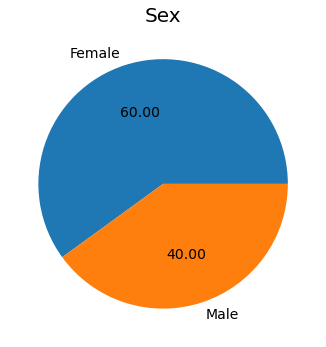

In [22]:

# Gender percentage: 
plot_pies(data=data_set, col="Sex", labels=["Female", "Male"], )





- Ulike normal and ar-risk data sets, here the Gender distribution is not balanced! 



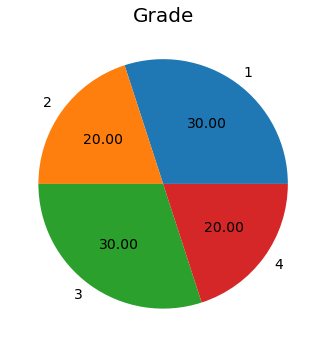

In [23]:

# Grages percentage:
plot_pies(data=data_set, col="Grade", labels=None, )



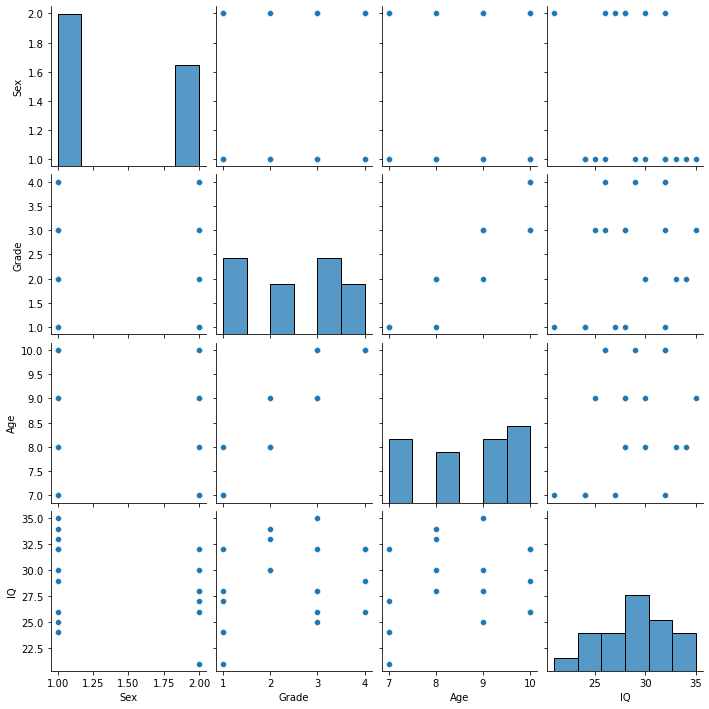

In [24]:

sns.pairplot(data=data_set)
plt.show()
    
    





The distribution of features in this dataset significantly varies from the previous version. Concretely, 

- Gender distribution is not balanced: unlike the previous version here we have more females.

- Most of the participants of the previous version were from 3rd and 4th grade, this is not the case here, more so, the 5th and 6 grades are missing here!, this also affects the age features (clearly).

- In the previous data set, IQ has a more or less power-law distribution, whereas it has a more or less normal distribution in the current version.





In [25]:




_ = dd.get_demo_datasets()


demo_phono = dd.concat_classes_demo()


df_data_to_use = demo_phono.loc[:, [
    'Group', 'SubjectID', 'Sex', 'Grade', 'Age', 'IQ', 'Reading_speed',
]]

c_features = ['Sex', 'Grade', ]
indicators = ['SubjectID', ]






Loading Demo data: 
  dyslexia (72, 9)
  norm (213, 9)
  risk (22, 9)
 


In [26]:
df_data_to_use

,Group,SubjectID,Sex,Grade,Age,IQ,Reading_speed
0,1,10,1,4,10,23,102.0
1,1,108,1,4,10,34,139.0
2,1,11,2,4,10,34,110.0
3,1,11_norm1,1,2,9,28,71.0
4,1,12_norm1,2,2,8,32,60.0
...,...,...,...,...,...,...,...
212,1,varya_norm1,1,1,7,34,56.0
68,3,vpa21,2,1,7,32,22.0
69,3,yea20,1,3,9,34,20.0
70,3,zaa15,1,3,10,31,78.0


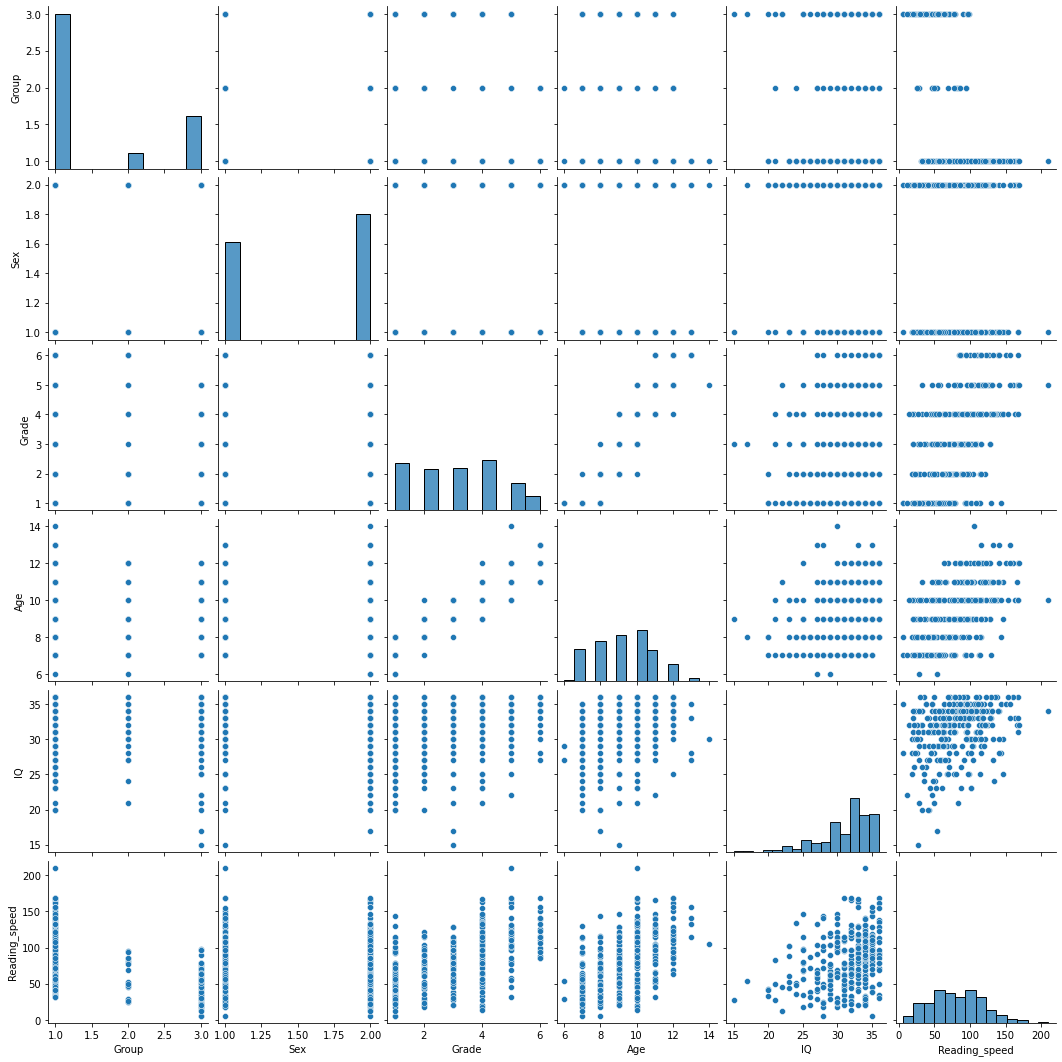

In [27]:


pr_demo_phono = df_data_to_use.values
cols = df_data_to_use.columns
demo_phono_pr = pd.DataFrame(data=pr_demo_phono, columns=cols)



# Prvisious data pairplots:
sns.pairplot(data=demo_phono_pr)
plt.show()
    
    